In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-cpi-trends-pivot/Global CPI Trends  (1).xlsx


In [46]:
#read in excel
df = pd.read_excel('/kaggle/input/global-cpi-trends-pivot/Global CPI Trends  (1).xlsx')
df

,Country / Territory,Year,Score,Rank,Sources
0,Afghanistan,2023,20.0,162.0,5.0
1,Albania,2023,37.0,98.0,7.0
2,Algeria,2023,36.0,104.0,7.0
3,Angola,2023,33.0,121.0,7.0
4,Argentina,2023,37.0,98.0,8.0
...,...,...,...,...,...
1262,Venezuela,2017,18.0,169.0,8.0
1263,Vietnam,2017,35.0,107.0,8.0
1264,Yemen,2017,16.0,175.0,7.0
1265,Zambia,2017,37.0,96.0,9.0


In [3]:
df = df.loc[df['Country / Territory'].isin(['United Kingdom','France','Germany'])]
df.head(21)

,Country / Territory,Year,Score,Rank,Sources
57,France,2023,71.0,20.0,8.0
61,Germany,2023,78.0,9.0,8.0
171,United Kingdom,2023,71.0,20.0,8.0
238,France,2022,72.0,21.0,8.0
242,Germany,2022,79.0,9.0,8.0
352,United Kingdom,2022,73.0,18.0,8.0
419,France,2021,71.0,22.0,8.0
423,Germany,2021,80.0,10.0,8.0
533,United Kingdom,2021,78.0,11.0,8.0
600,France,2020,85.0,3.0,8.0


In [28]:
df = df.replace([np.nan, -np.inf], 0)
df

,Country / Territory,Year,Score,Rank,Sources
0,Afghanistan,2023,20.0,162.0,5.0
1,Albania,2023,37.0,98.0,7.0
2,Algeria,2023,36.0,104.0,7.0
3,Angola,2023,33.0,121.0,7.0
4,Argentina,2023,37.0,98.0,8.0
...,...,...,...,...,...
1262,Venezuela,2017,18.0,169.0,8.0
1263,Vietnam,2017,35.0,107.0,8.0
1264,Yemen,2017,16.0,175.0,7.0
1265,Zambia,2017,37.0,96.0,9.0


In [6]:
df.dtypes

Country / Territory    object
Year                    int64
Score                   int64
Rank                    int64
Sources                 int64
dtype: object

In [29]:
# convert int64 to int32
df.Year =df.Year.astype('int32')
df.dtypes

Country / Territory     object
Year                     int32
Score                  float64
Rank                   float64
Sources                float64
dtype: object

In [11]:
#convert int32 to datetime64[ns]
df.Year =pd.to_datetime(df.Year , format = '%Y')
df.dtypes


Country / Territory            object
Year                   datetime64[ns]
Score                           int64
Rank                            int64
Sources                         int64
dtype: object

In [7]:
UK = df.loc[(df['Country / Territory'] == 'United Kingdom')]
France = df.loc[(df['Country / Territory'] == 'France')]
Germany = df.loc[(df['Country / Territory'] == 'Germany')]

print(UK)

     Country / Territory  Year  Score   Rank  Sources 
171       United Kingdom  2023    71.0  20.0       8.0
352       United Kingdom  2022    73.0  18.0       8.0
533       United Kingdom  2021    78.0  11.0       8.0
714       United Kingdom  2020    71.0  21.0       8.0
895       United Kingdom  2019    77.0  12.0       8.0
1076      United Kingdom  2018    80.0  11.0       8.0
1257      United Kingdom  2017    82.0   8.0       8.0


In [8]:
## Central Tendicies 
## mean 
a = np.mean(UK['Score '])
b = np.mean(France['Score '])
c = np.mean(Germany['Score '])
print("England Mean:",a,"France Mean:",b,"Germany Mean:",c)
## median 
d = np.median(UK['Score '])
e = np.median(France['Score '])
f = np.median(Germany['Score '])
print("England Median:",d,"France Median:",e,"Germany Median:",f)
from scipy import stats
g = stats.mode(UK['Score '])
h = stats.mode(France['Score '])
i = stats.mode(Germany['Score '])
print("England Mode:",g,"France Mode:",h,"Germany Mode:",i)

England Mean: 76.0 France Mean: 72.85714285714286 Germany Mean: 76.28571428571429
England Median: 77.0 France Median: 71.0 Germany Median: 80.0
England Mode: ModeResult(mode=71.0, count=2) France Mode: ModeResult(mode=71.0, count=2) Germany Mode: ModeResult(mode=80.0, count=3)


<function matplotlib.pyplot.show(close=None, block=None)>

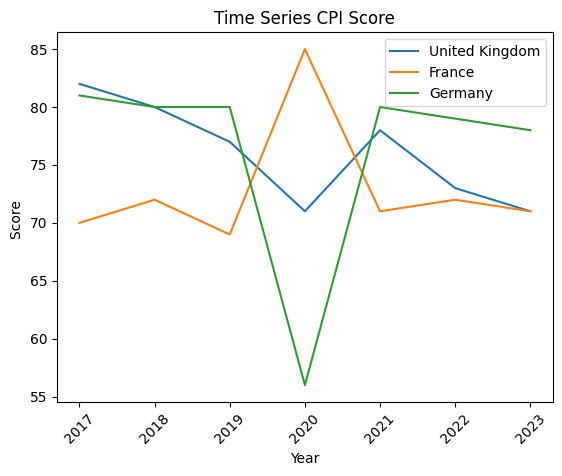

In [9]:
countries = ['United Kingdom', 'France', 'Germany']
for country in countries:
    df_country = df.loc[(df['Country / Territory'] == country)]
    
    df_country.set_index(df_country.Year, inplace=True)
    plt.plot(df_country.index, df_country['Score '])

plt.xlabel('Year')
plt.ylabel('Score ')
plt.xticks(rotation=45)
plt.title('Time Series CPI Score')
plt.legend(labels=countries, loc='best')

plt.show

# ***Time Series Forecasting of the UK***

In [ ]:
#Time Series Forecasting of the UK - using ARIMA 
## extract relevant columns 
UK_ML = UK[['Year', 'Score ']]

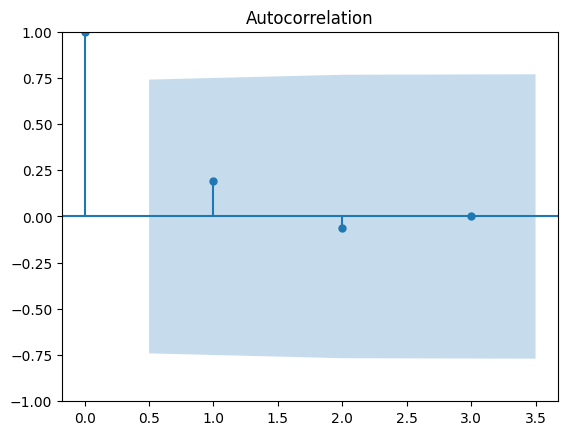

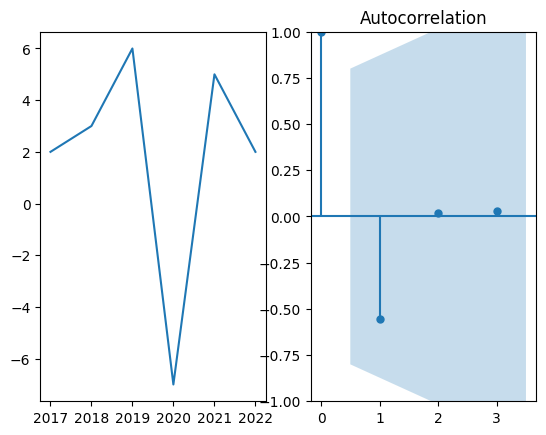

In [241]:
## need to define dqp for arima 
#Plotting Autocorrelation 
plot_acf(UK_ML['Score '])
plt.show()

UK_f=plt.figure()
UK_ax1 = UK_f.add_subplot(121)
UK_ax1.plot(UK_ML['Score '].diff())

UK_ax2 = UK_f.add_subplot(122)
plot_acf(UK_ML['Score '].diff().dropna(), ax=UK_ax2)
plt.show()


In [83]:
#ADF Test - test to claculate optimal d score 
from statsmodels.tsa.stattools import adfuller
result = adfuller(UK_ML['Score '].dropna())
print('p-value: %f' % result[1])

result = adfuller(UK_ML['Score '].diff().dropna())
print('p-value: %f' % result[1])

result = adfuller(UK_ML['Score '].diff().diff().dropna())
print('p-value: %f' % result[1])

result = adfuller(UK_ML['Score '].diff().diff().diff().dropna())
print('p-value: %f' % result[1])


p-value: 0.653757
p-value: 0.018071
p-value: 0.011590
p-value: 0.011424


In [123]:
UK_ML.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2023-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   7 non-null      float64
dtypes: float64(1)
memory usage: 112.0 bytes


In [124]:
#Convert Data Frame into a series - as it's single column 
UK_S=pd.Series(data=UK_ML['Score '])

In [131]:
UK_S.info()
print(UK_S)

<class 'pandas.core.series.Series'>
DatetimeIndex: 7 entries, 2023-01-01 to 2017-01-01
Series name: Score 
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 112.0 bytes
Year
2023-01-01    71.0
2022-01-01    73.0
2021-01-01    78.0
2020-01-01    71.0
2019-01-01    77.0
2018-01-01    80.0
2017-01-01    82.0
Name: Score , dtype: float64


In [202]:
#Created Arima model 
model_arima_UK = ARIMA(UK_S, order=(3,2,1))
model_arima_fit_UK = model_arima_UK.fit()


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [203]:
model_arima_fit_UK

In [204]:
model_arima_fit_UK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Score    No. Observations:                    7
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 -12.638
Date:                Tue, 27 Aug 2024   AIC                             35.276
Time:                        12:40:03   BIC                             33.323
Sample:                             0   HQIC                            30.034
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3563      6.424     -0.211      0.833     -13.946      11.234
ar.L2         -1.3492      6.344     -0.213      0.832     -13.784      11.086
ar.L3         -0.9922      0.033    -29.654      0.000      -1.058      -0.927
ma.L1          0.6245     22.267      0.028      0.978     -43.017      44.266
sigma2         0.6274      4.873      0.129      0.898      -8.924      10.179
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.64   Prob(JB):                         0.87
Heteroskedasticity (H):               0.89   Skew:                            -0.49
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
help(model_arima_fit_UK.forecast)

Help on method forecast in module statsmodels.tsa.statespace.mlemodel:

forecast(steps=1, signal_only=False, **kwargs) method of statsmodels.tsa.arima.model.ARIMAResultsWrapper instance
    forecast(self, steps=1, signal_only=False, **kwargs)
    
    Out-of-sample forecasts
    
    Parameters
    ----------
    steps : int, str, or datetime, optional
        If an integer, the number of steps to forecast from the end of the
        sample. Can also be a date string to parse or a datetime type.
        However, if the dates index does not have a fixed frequency, steps
        must be an integer. Default is 1.
    signal_only : bool, optional
        Whether to compute forecasts of only the "signal" component of
        the observation equation. Default is False. For example, the
        observation equation of a time-invariant model is
        :math:`y_t = d + Z \alpha_t + \varepsilon_t`, and the "signal"
        component is then :math:`Z \alpha_t`. If this argument is set to
       

In [205]:
forecast= model_arima_fit_UK.forecast(steps=5)
print(forecast)

7     76.469901
8     85.478907
9     85.919856
10    85.837719
11    83.598622
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [157]:
# Calculate the mean
UK_mean = np.mean(UK_ML)

# Calculate the squared differences
UK_squared_diffs = (UK_ML - UK_mean) ** 2

# Calculate the variance
UK_variance = np.mean(UK_squared_diffs)

print("Variance:", UK_variance)


Variance: 16.571428571428573


In [242]:
#calculate variance of forecasted values 
UK_CPI_Future = [76.469901,
85.478907,
85.919856,
85.837719,
83.598622]
# Calculate the mean
F_UK_mean = np.mean(UK_CPI_Future)

# Calculate the squared differences
F_UK_squared_diffs = (UK_CPI_Future - F_UK_mean) ** 2

# Calculate the variance
F_UK_variance = np.mean(F_UK_squared_diffs)

print("Variance:", F_UK_variance)


Variance: 12.932223947405229


In [208]:
## Calculating the mean of the UK Scores 
UK_CPI_Future = [76.469901,
85.478907,
85.919856,
85.837719,
83.598622]

mean_cpi_uk = np.mean(UK_CPI_Future)
print(mean_cpi_uk)

# mean average of 83 

83.46100099999998


# **Time Series Forecasting for France - using ARIMA**

In [177]:
## extract relevant columns 
France_ML = France[['Year', 'Score ']]

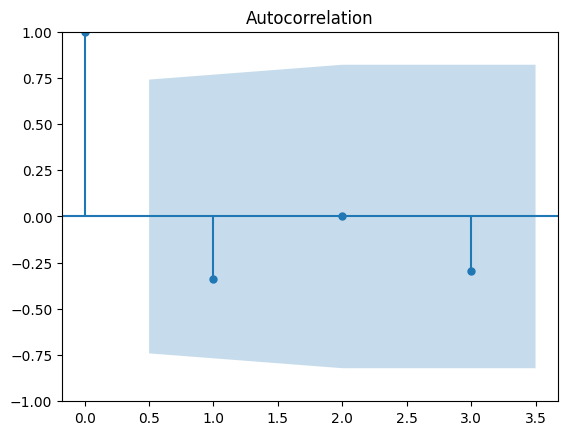

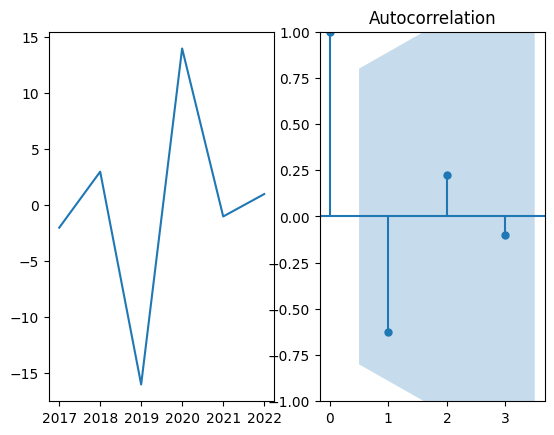

In [243]:
## need to define dqp for arima 
#Plotting Autocorrelation 
plot_acf(France_ML['Score '])
plt.show()

FRANCE_f=plt.figure()
FRANCE_ax1 = FRANCE_f.add_subplot(121)
FRANCE_ax1.plot(France_ML['Score '].diff())

FRANCE_ax2 = FRANCE_f.add_subplot(122)
plot_acf(France_ML['Score '].diff().dropna(), ax=FRANCE_ax2)
plt.show()


In [166]:
#ADF Test - test to claculate optimal d score 
from statsmodels.tsa.stattools import adfuller
result = adfuller(France_ML['Score '].dropna())
print('p-value: %f' % result[1])

result = adfuller(France_ML['Score '].diff().dropna())
print('p-value: %f' % result[1])

result = adfuller(France_ML['Score '].diff().diff().dropna())
print('p-value: %f' % result[1])

result = adfuller(France_ML['Score '].diff().diff().diff().dropna())
print('p-value: %f' % result[1])


p-value: 0.048983
p-value: 0.005155
p-value: 0.002505
p-value: 0.009499


In [178]:
France_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 57 to 1143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Score   7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 168.0 bytes


In [181]:
# convert Year to date 
France_ML['Year']=pd.to_datetime(France_ML['Year'],format='%Y')


/tmp/ipykernel_33/1199317971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  France_ML['Year']=pd.to_datetime(France_ML['Year'],format='%Y')


In [185]:
## Set year to index

France_ML= France_ML.set_index('Year')

In [186]:
France_ML.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2023-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   7 non-null      float64
dtypes: float64(1)
memory usage: 112.0 bytes


In [188]:
#Convert Data Frame into a series - as it's single column 
FRA_S=pd.Series(data=France_ML['Score '])

In [212]:
#Created Arima model 

import statsmodels.api as sm
model_arima_France = sm.tsa.arima.ARIMA(FRA_S, order=(1,1,1))
model_arima_fit_FRA = model_arima_France.fit()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

In [213]:
model_arima_fit_FRA

In [214]:
model_arima_fit_FRA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Score    No. Observations:                    7
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -19.538
Date:                Tue, 27 Aug 2024   AIC                             45.075
Time:                        12:42:17   BIC                             44.451
Sample:                             0   HQIC                            42.575
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2145      0.888     -0.242      0.809      -1.954       1.525
ma.L1         -0.9985    307.172     -0.003      0.997    -603.044     601.047
sigma2        26.7811   8206.686      0.003      0.997   -1.61e+04    1.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.66   Prob(JB):                         0.31
Heteroskedasticity (H):              38.76   Skew:                             1.49
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [216]:
forecast_FRA = model_arima_fit_FRA.forecast(steps=5)
print(forecast_FRA)

7     73.621882
8     72.844931
9     73.011599
10    72.975846
11    72.983516
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [236]:
# Calculate the mean
FRA_mean = np.mean(France_ML)

# Calculate the squared differences
FRA_squared_diffs = (France_ML - FRA_mean) ** 2

# Calculate the variance
FRA_variance = np.mean(FRA_squared_diffs)
print("Variance:", FRA_variance)

Variance: 25.55102040816326


In [237]:
# Calculate future forecasted values for France 
FRA_CPI_Future = [ 73.621882,
72.844931,
73.011599,
72.975846,
72.983516]
# Calculate the mean
F_FRA_mean = np.mean(FRA_CPI_Future)

# Calculate the squared differences
F_FRA_squared_diffs = (FRA_CPI_Future - F_FRA_mean) ** 2

# Calculate the variance
F_FRA_variance = np.mean(F_FRA_squared_diffs)

print("Variance:", F_FRA_variance)

Variance: 0.07468881528855956


In [221]:
## Calculating the mean of the France Forecasted Scores 
FRA_CPI_Future = [ 73.621882,
72.844931,
73.011599,
72.975846,
72.983516]

mean_cpi_fra = np.mean(FRA_CPI_Future)
print(mean_cpi_fra)

# mean average of 73

73.08755479999999


# **Time Series Forecasting for Germany - using ARIMA**

In [222]:
## extract relevant columns 
Germany_ML = Germany[['Year', 'Score ']]

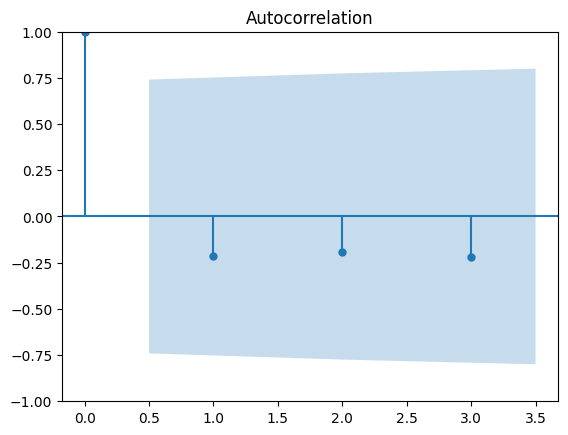

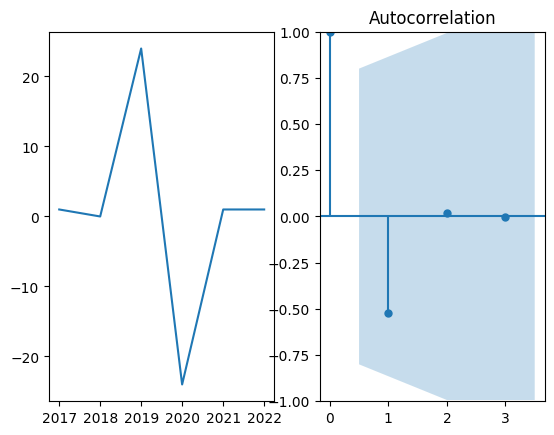

In [244]:
## need to define dqp for arima 
#Plotting Autocorrelation 
plot_acf(Germany_ML['Score '])
plt.show()

GERMANY_f=plt.figure()
GERMANY_ax1 = GERMANY_f.add_subplot(121)
GERMANY_ax1.plot(Germany_ML['Score '].diff())

GERMANY_ax2 = GERMANY_f.add_subplot(122)
plot_acf(Germany_ML['Score '].diff().dropna(), ax=GERMANY_ax2)
plt.show()

In [224]:
#ADF Test - test to claculate optimal d score 
from statsmodels.tsa.stattools import adfuller
result = adfuller(Germany_ML['Score '].dropna())
print('p-value: %f' % result[1])

result = adfuller(Germany_ML['Score '].diff().dropna())
print('p-value: %f' % result[1])

result = adfuller(Germany_ML['Score '].diff().diff().dropna())
print('p-value: %f' % result[1])

result = adfuller(Germany_ML['Score '].diff().diff().diff().dropna())
print('p-value: %f' % result[1])

p-value: 0.123809
p-value: 0.027860
p-value: 0.018478
p-value: 0.039835


In [225]:
Germany_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 61 to 1147
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Score   7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 168.0 bytes


In [226]:
# convert Year to date 
Germany_ML['Year']=pd.to_datetime(Germany_ML['Year'],format='%Y')

/tmp/ipykernel_33/788047783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Germany_ML['Year']=pd.to_datetime(Germany_ML['Year'],format='%Y')


In [227]:
## Set year to index

Germany_ML= Germany_ML.set_index('Year')

In [228]:
Germany_ML.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2023-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   7 non-null      float64
dtypes: float64(1)
memory usage: 112.0 bytes


In [229]:
#Convert Data Frame into a series - as it's single column 
GER_S=pd.Series(data=Germany_ML['Score '])

In [245]:
#Created Arima model 
import statsmodels.api as sm
model_arima_Germany = sm.tsa.arima.ARIMA(GER_S, order=(1,1,1))
model_arima_fit_GER = model_arima_Germany.fit()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

In [246]:
model_arima_fit_GER

In [247]:
model_arima_fit_GER.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Score    No. Observations:                    7
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -22.649
Date:                Tue, 27 Aug 2024   AIC                             51.298
Time:                        13:10:23   BIC                             50.673
Sample:                             0   HQIC                            48.797
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0780      0.922     -0.085      0.933      -1.885       1.729
ma.L1         -0.9995    801.657     -0.001      0.999   -1572.218    1570.219
sigma2        78.6875    6.3e+04      0.001      0.999   -1.23e+05    1.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.68   Prob(JB):                         0.25
Heteroskedasticity (H):              29.64   Skew:                            -1.61
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [248]:
forecast_GER = model_arima_fit_GER.forecast(steps=5)
print(forecast_GER)

7     75.844072
8     76.246156
9     76.214800
10    76.217245
11    76.217054
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [249]:
# Calculate the mean
GER_mean = np.mean(Germany_ML)

# Calculate the squared differences
GER_squared_diffs = (Germany_ML - GER_mean) ** 2

# Calculate the variance
GER_variance = np.mean(GER_squared_diffs)
print("Variance:", GER_variance)

Variance: 69.3469387755102


In [250]:
# Calculate future forecasted values for Germany
GER_CPI_Future = [75.844072,
76.246156,
76.214800,
76.217245,
76.217054]
# Calculate the mean
F_GER_mean = np.mean(GER_CPI_Future)

# Calculate the squared differences
F_GER_squared_diffs = (GER_CPI_Future - F_GER_mean) ** 2

# Calculate the variance
F_GER_variance = np.mean(F_GER_squared_diffs)

print("Variance:", F_GER_variance)

Variance: 0.023206460775040513


In [252]:
#Calculating the mean of the forecatsed Germany scores 
GER_CPI_Future = [75.844072,
76.246156,
76.214800,
76.217245,
76.217054]

mean_cpi_ger = np.mean(GER_CPI_Future)
print(mean_cpi_ger)

# mean average of 76

76.1478654


# **Comparing the Means of the forecasted Countries **

UK = 83,
France = 73,
Germany = 76 

> **Based on these three ARIMA models the UK will have a much higher mean average CPI score over the next 5 years.****